# DSP1: Final exam

### Date: March 4

### Time: 15:00 - 17:00

**Instructions:** 
* Write your full name and group number in the title of file;
* All answers should be filled in the notebook and then submitted to Moodle;
* Try to use fewer cells for compilation (for example, you can use print for several answers, instead of printing each answer on a separate cell)
* **IMPORTANT NOTE:** you will get points only for correct answers, not for trials or wrong answers. Your notebook should run if I will press **"Restart Kernel"** and then press **"Run All"**. I am going to check answers only after doing that. If the code do not compile, you will not get full mark. 

## Use the dataset with car prices - cars.csv, you will need it for all questions.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats
import math
import seaborn as sns
import matplotlib.pyplot as plt

cars = pd.read_csv('cars.csv')
cars.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,carBrand,BrandModel
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,Audi,Audi - A1
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,Audi,Audi - A6
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,Audi,Audi - A1
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,Audi,Audi - A4
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,Audi,Audi - A3


## Q1 (10%)
Among the variables price, tax, mpg and engineSize, which one seems to be approximately normally distributed? Prove your answer.

In [2]:
def dis(data):
    print("Mean: " + str(data.mean()))
    print("Median: " + str(data.median()))
    print("Mode:  " + str(data.mode().values[0]))

In [3]:
print('Price:')
dis(cars['price'])
print('Tax:')
dis(cars['tax'])
print('Mpg:')
dis(cars['mpg'])
print('Tax:')
dis(cars['tax'])

Price:
Mean: 23529.611490395742
Median: 21000.0
Mode:  19995
Tax:
Mean: 129.2893716732238
Median: 145.0
Mode:  145
Mpg:
Mean: 54.190063064102105
Median: 52.3
Mode:  56.5
Tax:
Mean: 129.2893716732238
Median: 145.0
Mode:  145


In [4]:
def emp_rule(data):
    
    oneStd1 = norm.cdf(x = data.mean() - data.std(), loc = data.mean(), scale = data.std())
    oneStd2 = norm.cdf(x = data.mean() + data.std(), loc = data.mean(), scale = data.std())

    print(f'{(oneStd2 - oneStd1).round(4) * 100} % ~ 68.25 %')

    twoStd1 = norm.cdf(x = data.mean() - 2*data.std(), loc = data.mean(), scale = data.std())
    twoStd2 = norm.cdf(x = data.mean() + 2*data.std(), loc = data.mean(), scale = data.std())

    print(f'{(twoStd2 - twoStd1).round(4) * 100} % ~ 95 %')

    threeStd1 = norm.cdf(x = data.mean() - 3*data.std(), loc = data.mean(), scale = data.std())
    threeStd2 = norm.cdf(x = data.mean() + 3*data.std(), loc = data.mean(), scale = data.std())

    print(f'{(threeStd2 - threeStd1).round(3) * 100} % ~ 99 %')


In [5]:
print('Price:')
emp_rule(cars['price'])

print('Tax:')
emp_rule(cars['tax'])

print('Mpg:')
emp_rule(cars['mpg'])

print('Tax:')
emp_rule(cars['tax'])



Price:
68.27 % ~ 68.25 %
95.45 % ~ 95 %
99.7 % ~ 99 %
Tax:
68.27 % ~ 68.25 %
95.45 % ~ 95 %
99.7 % ~ 99 %
Mpg:
68.27 % ~ 68.25 %
95.45 % ~ 95 %
99.7 % ~ 99 %
Tax:
68.27 % ~ 68.25 %
95.45 % ~ 95 %
99.7 % ~ 99 %


Price:


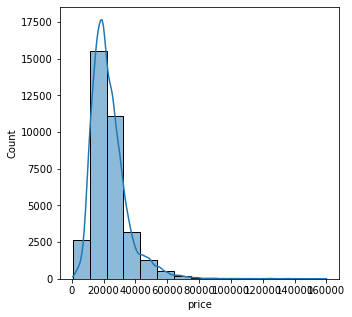

In [6]:
def grams(data):
    plt.figure(figsize = (5, 5))
    sns.histplot(data, bins = 15, kde = True)

print('Price:')
grams(cars['price'])


Tax:


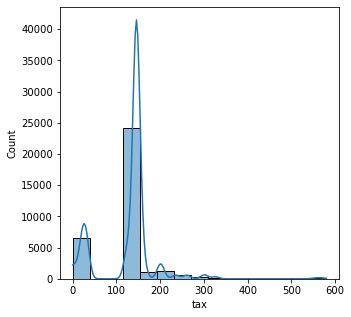

In [7]:
print('\nTax:')
grams(cars['tax'])


Mpg:


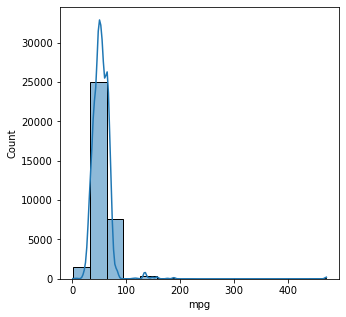

In [8]:
print('\nMpg:')
grams(cars['mpg'])


Tax:


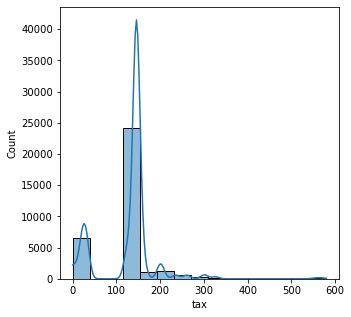

In [9]:
print('\nTax:')
grams(cars['tax'])

#### The end: The normal distribution is a continuous probability distribution that is symmetrical around its mean, most of the observations cluster around the central peak, and the probabilities for values further away from the mean taper off equally in both directions. Extreme values in both tails of the distribution are similarly unlikely.

## Q2 (10%)
Create a function that takes a column as an input, and returns number of outliers in that column. 

Then apply this function to each column. 

Print column name and number of outliers together.


In [10]:
# Please, write your code here

def question2(column):
    Q3 = cars[column].quantile(.75)  
    Q1 = cars[column].quantile(.25) 
    IQR = Q3 - Q1 
    count = 0

    for i in range(0, len(cars[column])):
        if(cars[column][i] > Q3 + (1.5 * IQR)):
            count = count + 1
        elif(cars[column][i] < Q1 - (1.5 * IQR)):
            count = count + 1

    return column, count

In [11]:
for column in cars.select_dtypes(include=np.number).columns:
    print(question2(column))

('year', 580)
('price', 1619)
('mileage', 1184)
('tax', 9189)
('mpg', 436)
('engineSize', 5880)


## Q3 (10%)
For Mercedes of **year 2020** and BMW of **year 2020** define separately new objects for:
1. size (i.e. number of observations) 
2. Price mean 
3. Price sample std 

And then print all of them properly.

*Hint:* you will get overall 6 objects. 

*Note:* you will need these objects in further questions, hence solve it properly.

In [12]:
# Please, write your code here

merce_y_2020 = cars[(cars['carBrand']=='Mercedes') & (cars['year']==2020)]

bmw_y_2020 = cars[(cars['carBrand']=='BMW') & (cars['year']==2020)]

In [13]:
merc_l = len(merce_y_2020)
bmw_l = len(bmw_y_2020)

merc_m = merce_y_2020['price'].mean()
bmw_m = bmw_y_2020['price'].mean()

merc_Std = merce_y_2020['price'].std()
bmw_Std = bmw_y_2020['price'].std()

print("size of Mercedes: ",merc_l)
print("size of BMW: ",bmw_l)

print("Price mean of Mercedes: ",merc_m)
print("Price mean of BMW: ",bmw_m)

print("Price sample std of Mercedes: ",merc_Std)
print("Price sample std of BMW: ",bmw_Std)

size of Mercedes:  719
size of BMW:  733
Price mean of Mercedes:  35433.28233657858
Price mean of BMW:  35377.680763983626
Price sample std of Mercedes:  13424.191653337006
Price sample std of BMW:  11323.814924985585


## Q4 (10%)
Some people believe that brand new (i.e. with year 2020) cars of  Mercedes and BMW have different (population) mean Price. Test that hypothesis with all necessary steps of hypothesis testing.

*Note:* assume that our dataset is a sample of different cars.

In [14]:
# Please, write your code here
group_p = cars.groupby(['year', 'carBrand','price'])
df = pd.concat([group_p.carBrand.count()], axis=1, keys="Counts")
print(df)

                      C
year carBrand price    
1970 Mercedes 24999   1
1996 BMW      5995    1
1997 Audi     4650    1
     BMW      3950    1
     Mercedes 9995    1
...                  ..
2020 Mercedes 76469   1
              76980   1
              138439  1
              154998  1
              159999  1

[18297 rows x 1 columns]


## Q5 (10%)
Take Audi with year 2009, and it will be your sample of cars. Now build 95% Confidence Interval for mileage of these cars. 

Is there evidence that these cars have mileage more than 80k miles?

In [15]:
# Please, write your code here
q5 = cars[(cars['carBrand']=='Audi') & (cars['year']==2009)]

In [16]:
mu = q5['mileage'].mean()

std_error = q5['mileage'].std()/len(q5['mileage'])

interval95 = norm.interval(0.95, mu, std_error)
print('Lower bound:', round(interval95[0], 2))
print('Upper bound:', round(interval95[1], 2))

Lower bound: 90300.07
Upper bound: 95000.28


## Q6 (10%)
Assume that car taxes are normally distributed. Calculate sample mean and sample standard deviation of taxes from this dataset. Take them as values of population parameters. Using these parameters answer the following questions:
1. Find the probability that randomly selected car from such population will have tax value between 100 and 200? Show your answer rounded to 3 decimal places.
2. Find the probability that randomly selected car from such population will have tax value below 60 or above 170? Show your answer rounded to 3 decimal places.

In [17]:
# Please, write your code here
mu = cars['tax'].mean()
sigma = cars['tax'].std()

res = norm.cdf(x = 200, loc = mu, scale = sigma) - norm.cdf(x = 100, loc = mu, scale = sigma)
print(round(res, 3))

res = 1 - (norm.cdf(x = 170, loc = mu, scale = sigma) - norm.cdf(x = 60, loc = mu, scale = sigma))
print(round(res, 3))

0.537
0.407


## Q7 (20%)
Using scikit-learn package you will need to build a **regression model.**

Target variable is **Tax**. 

Use any **THREE** variables as regressors (independent variables). 

Split to train test parts with **20%** for test. 

Train model and evaluate it properly on test set. 

Show slope and intercept values. Interpret them. 

Comment results of your model.

*Note:* if you are using categorical variable, it is not necessary to use interaction.

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y = cars['tax']
X = cars.iloc[:, [4, 7, 8]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

MSE:  3341.1470391981547
R2:  0.24986021731242247


In [19]:
print('Intercept: ', model.intercept_)

i = 0
for coef in model.coef_:
    print(f'Coefficicent {i + 1}: ', coef)
    i = i + 1

Intercept:  124.88959296624401
Coefficicent 1:  -0.0003247689682668147
Coefficicent 2:  -0.972560825158268
Coefficicent 3:  31.4976907507206


The Intercept we've got is initial point from which line starts, in my case 117.841. We also get this value when our xs are 0.
Coefficients show the change of the y when we increase x for one unit.

I can conclude that taking mileage, mpg and engineSize gives us the best result in terms of MSE and R2 metrics(of course if we consider only 3 regressors to pick)

## Q8 (20%)
Using scikit-learn package you  will need to build a **classification model.** 

You have updated dataset **cars_2** below.

Target variable is **Efficient**, which is a new variable created below. It shows if a car has efficient fuel consumption (i.e. mpg above 65). 

You can use any **THREE** variables as regressors (independent variables), except **mpg** itself.

Split to train test parts with **20%** for test. 

Train model and evaluate it properly on test set. 

Comment results of your model.

In [20]:
cars_2 = cars.copy()
cars_2.loc[:, 'efficient'] = 0
cars_2.loc[cars.mpg > 65, 'efficient'] = 1 
cars_2.drop('mpg', axis=1, inplace=True)
cars_2.head()

,model,year,price,transmission,mileage,fuelType,tax,engineSize,carBrand,BrandModel,efficient
0,A1,2017,12500,Manual,15735,Petrol,150,1.4,Audi,Audi - A1,0
1,A6,2016,16500,Automatic,36203,Diesel,20,2.0,Audi,Audi - A6,0
2,A1,2016,11000,Manual,29946,Petrol,30,1.4,Audi,Audi - A1,0
3,A4,2017,16800,Automatic,25952,Diesel,145,2.0,Audi,Audi - A4,1
4,A3,2019,17300,Manual,1998,Petrol,145,1.0,Audi,Audi - A3,0


In [21]:
# Please, write your code here
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

y = cars_2['efficient']
X = cars_2.iloc[:, [1, 2, 6]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('F1: ', f1_score(y_test, y_pred))

F1:  0.5752143413873734


We've got F1-score 0.574 which is not so good enough. But I just discovered target variable has strong dependence of tax variable and with mix of year and price variables it gives such F1 score, while engineSize has almost no effect on target.

---

### Evaluation (Keep it!)

| Question | Mark     | Comment   
|:-------:|:--------:|:----------------------
| 1       |   10/10    |     
| 2       |   10/10 | 
| 3       |   10/10     |    
| 4       |   10/10    |     
| 5       |   10/10 | 
| 6       |   10/10     |   
| 7       |   20/20    |     
| 8       |   20/20 | 
|**Total**|**100/100**  | 
